### **Supervised Learning : Time Series Regression**

In [154]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
#display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [156]:
#load dataset
df = pd.read_csv('../dataset/data.csv')
df.head()

,Date,Price_x,Qty,TotalAmount,Product Name,Price_y,StoreName,GroupStore,Type,Age,Gender,Marital Status,Income
0,2022-01-01,7500,4,30000,Crackers,7500,Prestasi Utama,Prestasi,General Trade,36,0,Married,"10,53"
1,2022-01-01,10000,7,70000,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,44,1,Married,"14,58"
2,2022-01-01,8800,4,35200,Choco Bar,8800,Gita Ginara,Gita,General Trade,27,1,Single,"0,18"
3,2022-01-01,8800,7,61600,Choco Bar,8800,Gita Ginara,Gita,General Trade,48,1,Married,"12,57"
4,2022-01-01,10000,1,10000,Yoghurt,10000,Gita Ginara,Gita,General Trade,33,0,Married,"6,95"


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            5020 non-null   object
 1   Price_x         5020 non-null   int64 
 2   Qty             5020 non-null   int64 
 3   TotalAmount     5020 non-null   int64 
 4   Product Name    5020 non-null   object
 5   Price_y         5020 non-null   int64 
 6   StoreName       5020 non-null   object
 7   GroupStore      5020 non-null   object
 8   Type            5020 non-null   object
 9   Age             5020 non-null   int64 
 10  Gender          5020 non-null   int64 
 11  Marital Status  5020 non-null   object
 12  Income          5020 non-null   object
dtypes: int64(6), object(7)
memory usage: 510.0+ KB


In [158]:
df_regression = df[['Date','Qty']].copy()
df_regression = df_regression.groupby('Date')['Qty'].sum().reset_index()

In [159]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Qty     365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [160]:
df_regression.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


### Analyze Time Series Data and Identify Autocorrelation Patterns

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':120})

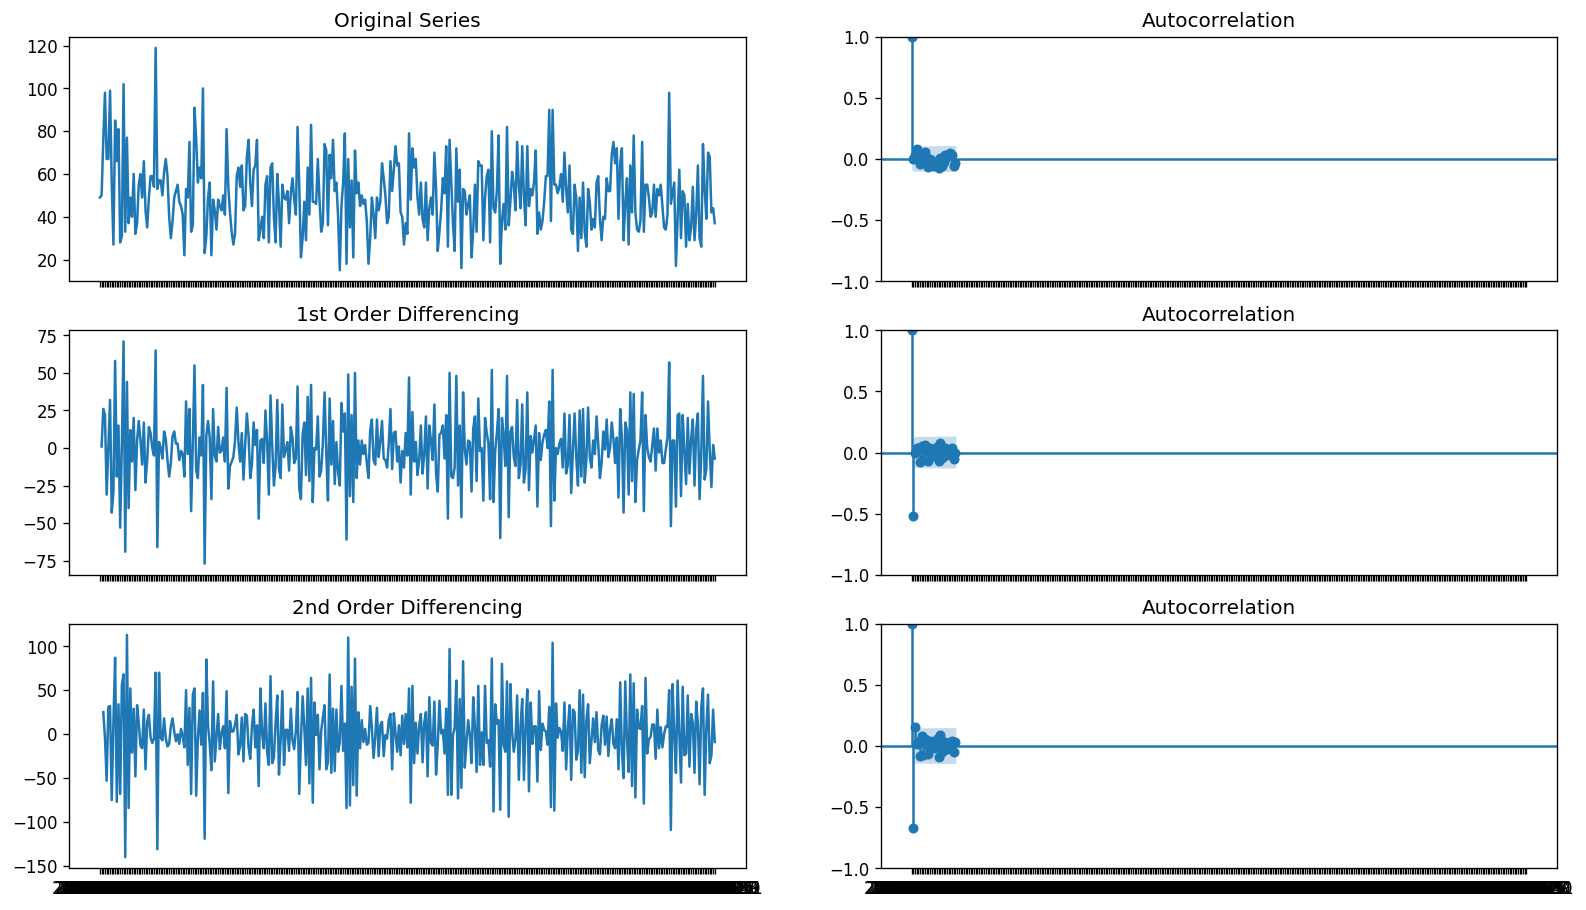

In [162]:
#Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_regression['Date'], df_regression['Qty'])
axes[0, 0].set_title('Original Series')
plot_acf(df_regression['Qty'], ax=axes[0, 1])

#1st Differencing
axes[1, 0].plot(df_regression['Date'], df_regression['Qty'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_regression['Qty'].diff().dropna(), ax=axes[1, 1])

#2nd Differencing
axes[2, 0].plot(df_regression['Date'], df_regression['Qty'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_regression['Qty'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [163]:
#transform qty to np.log
df_regression['log_qty'] = np.log(df_regression['Qty'])

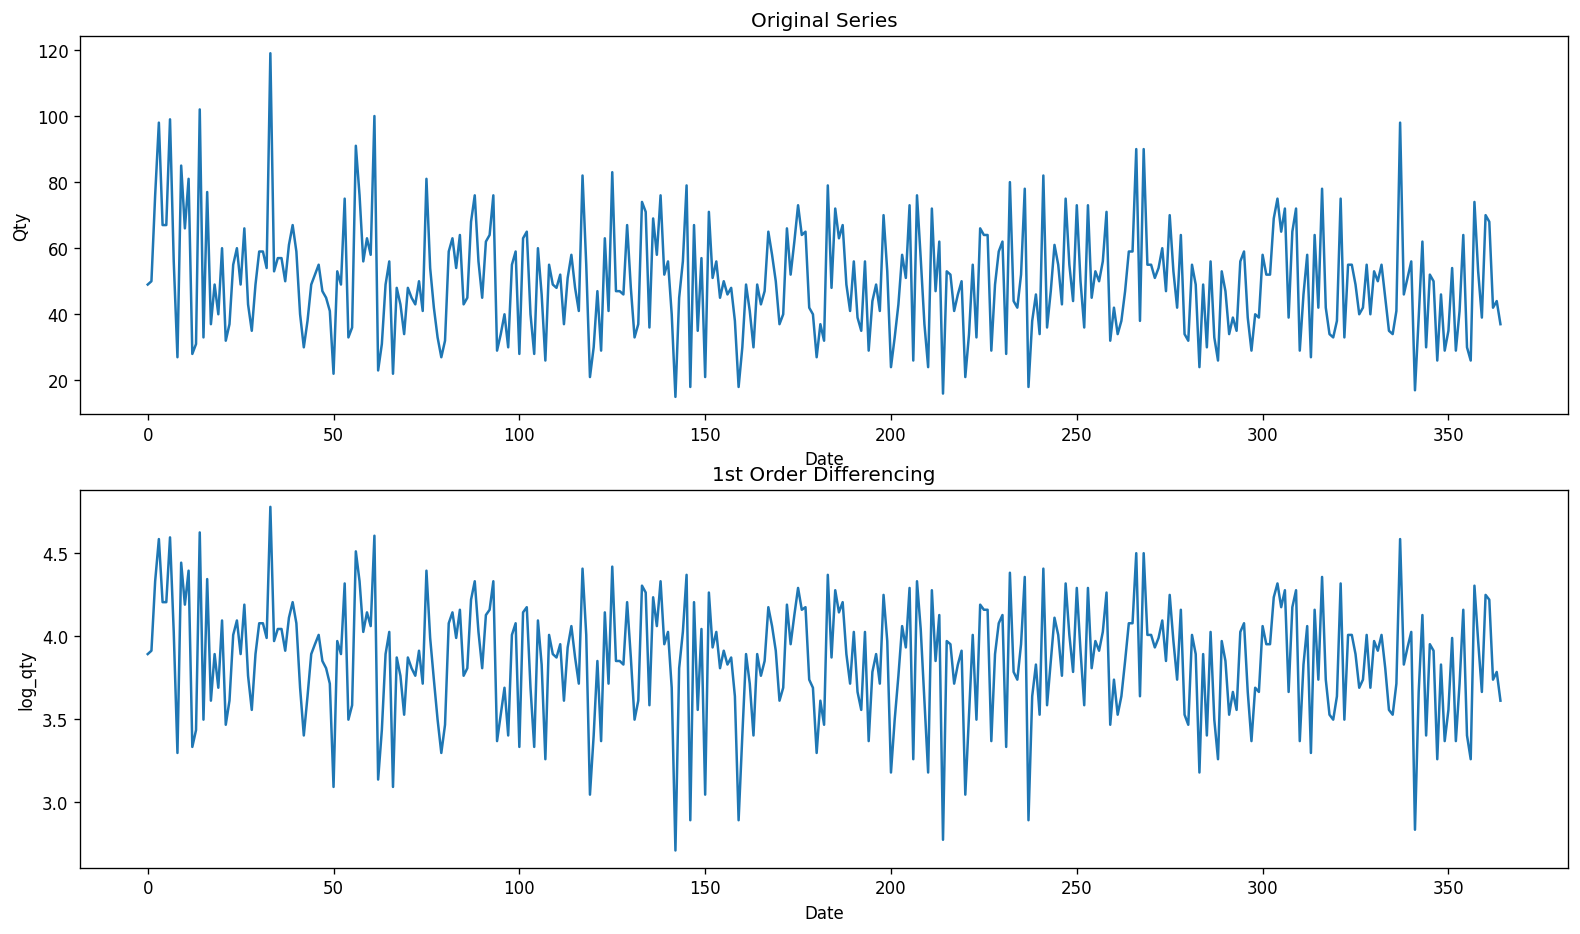

In [164]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.plot(df_regression['Qty'])
plt.title('Original Series')
plt.xlabel('Date')
plt.ylabel('Qty')

plt.subplot(2,1,2)
plt.plot(df_regression['log_qty'])
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('log_qty')
plt.show()

### Time Series Decomposition

<Figure size 1920x1080 with 0 Axes>

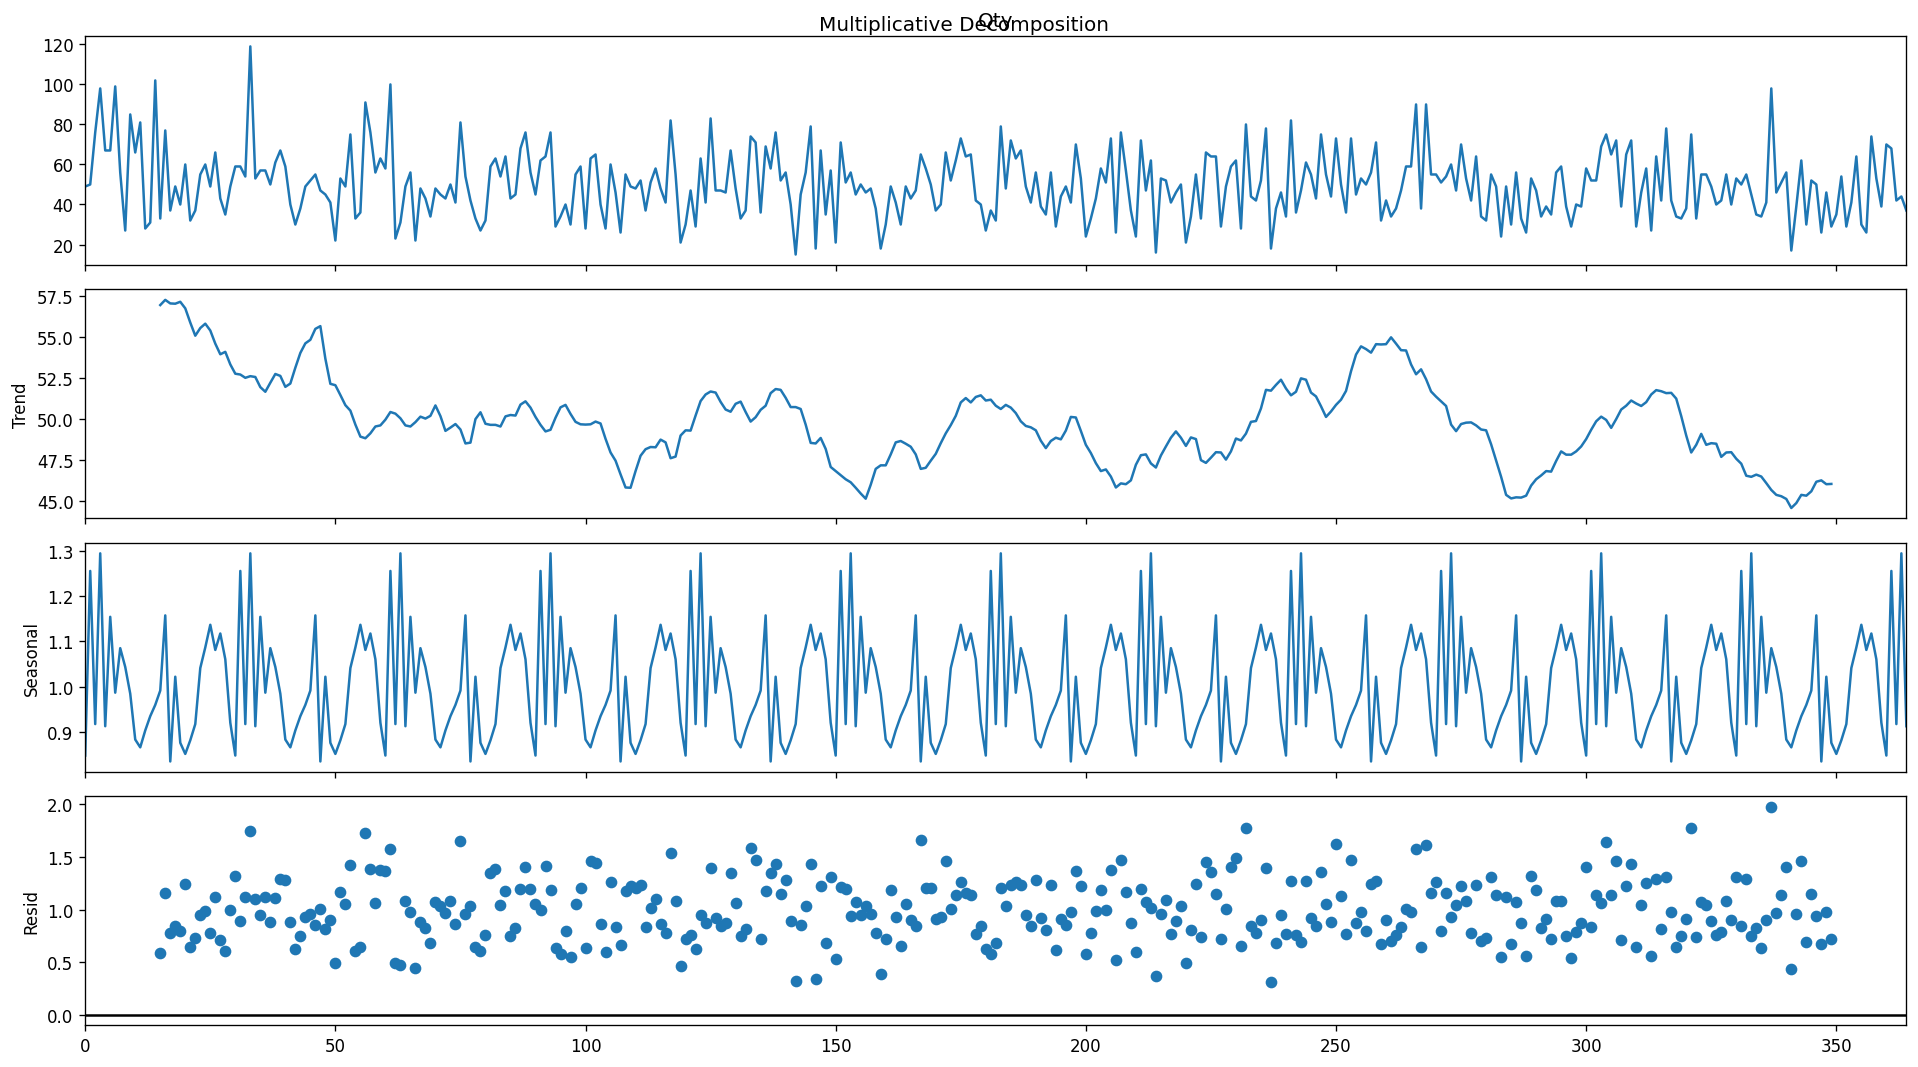

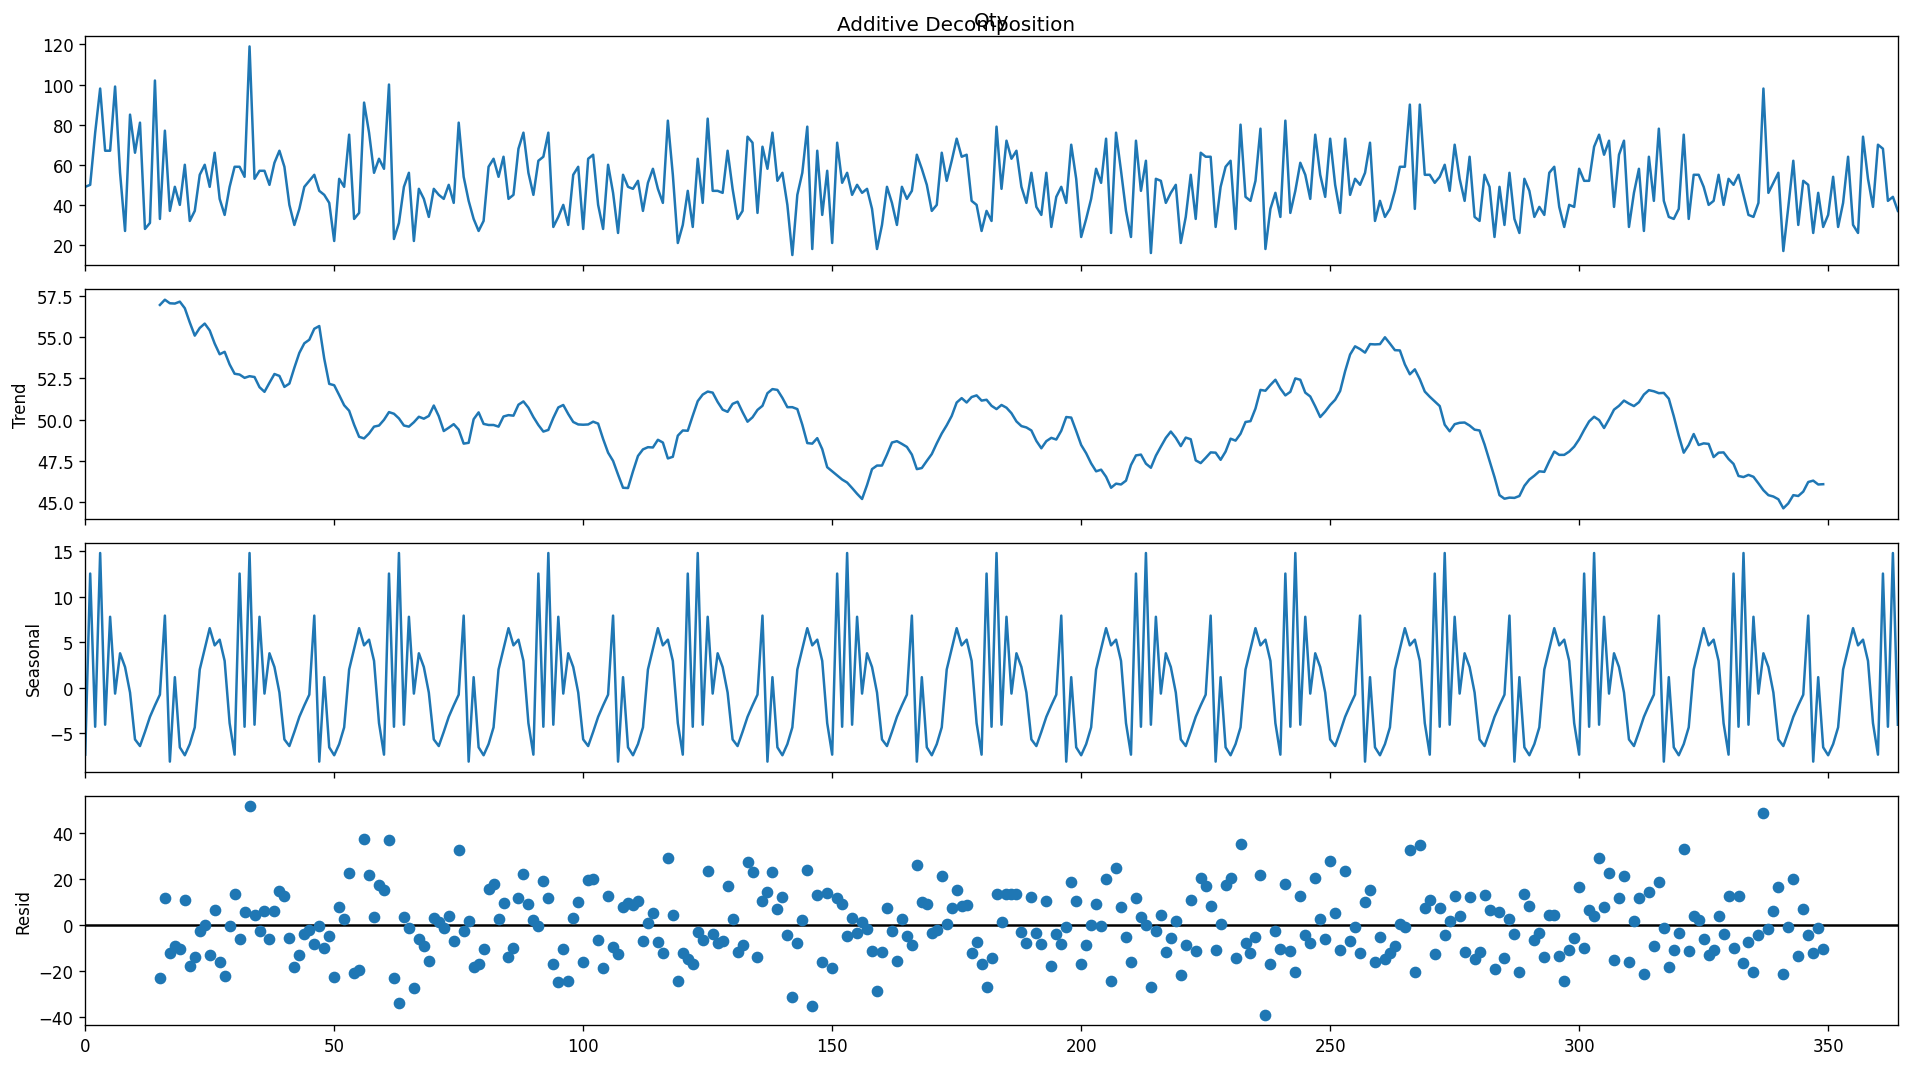

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

multiple_decomposition = seasonal_decompose(df_regression['Qty'], model='multiplicative',period=30)

additional_decomposition = seasonal_decompose(df_regression['Qty'], model='additive',period=30)

plt.figure(figsize=(16,9))
multiple_decomposition.plot().suptitle('Multiplicative Decomposition')

additional_decomposition.plot().suptitle('Additive Decomposition')
plt.show()


### Stationary and Non-Stationary Time Series

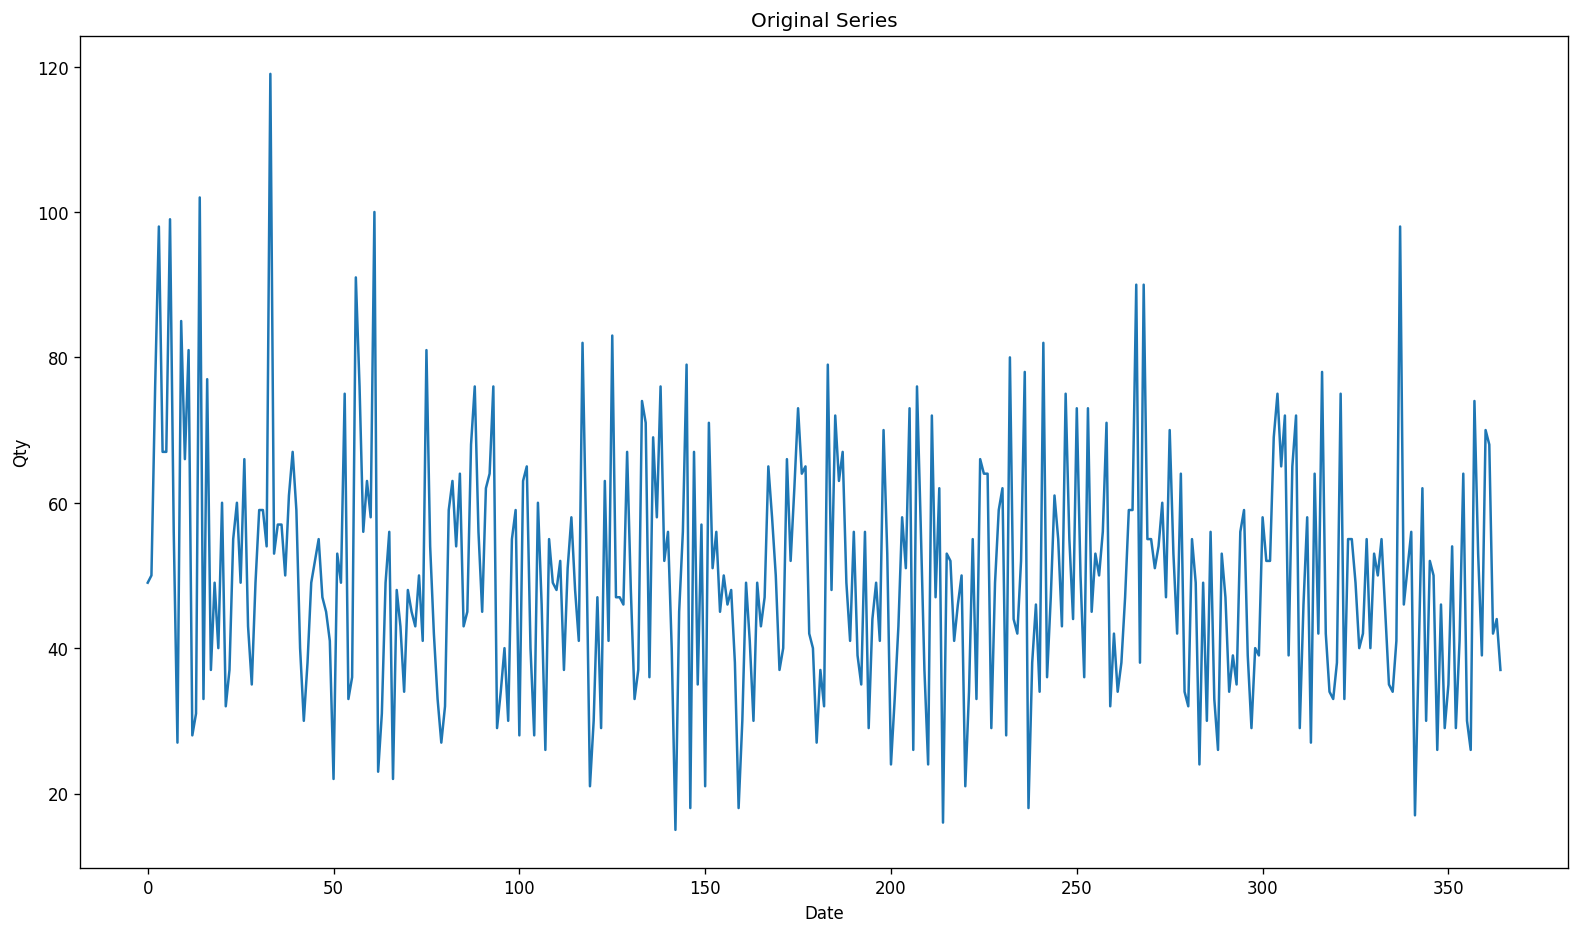

Augmented Dickey-Fuller Test:
ADF Statistic: -19.018782802299725
p-value: 0.0
Number of Lags: 0
Number of Observations Used: 364
Critical Values:
	1%, -3.4484434475193777
	5%, -2.869513170510808
	10%, -2.571017574266393


In [166]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries, autolag='AIC'):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of Lags: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}, {value}')

time_series_df = df_regression['Qty']

plt.figure(figsize=(16,9))
plt.plot(time_series_df)
plt.title('Original Series')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()

print('Augmented Dickey-Fuller Test:')
adf_test(time_series_df)

 ***Observasi***

 * Based on the Augmented Dickey-Fuller Test results, it shows that overall, the time series can be considered as stationary, because :
    * ADF statistic is smaller than the critical value at 1%, 5%, and 10% significance levels.
    * The P-value is less than the 0.05 significance level.

### Detrend a Time Series

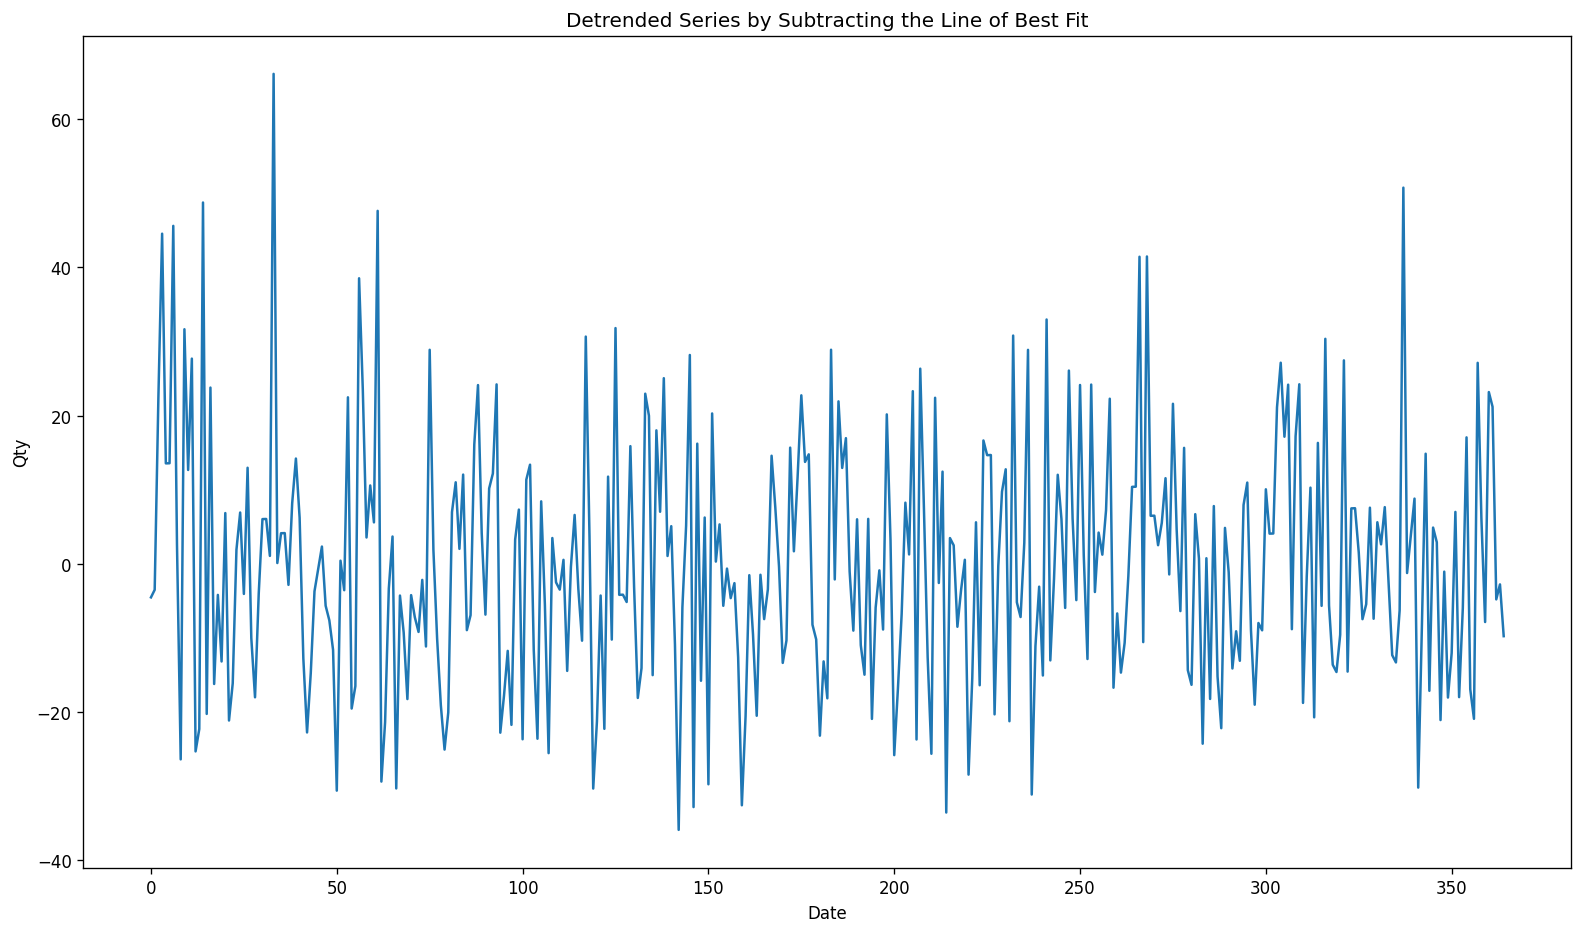

In [167]:
from scipy import signal

detrended = signal.detrend(time_series_df)

plt.figure(figsize=(16,9))
plt.plot(detrended)
plt.title('Detrended Series by Subtracting the Line of Best Fit')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()

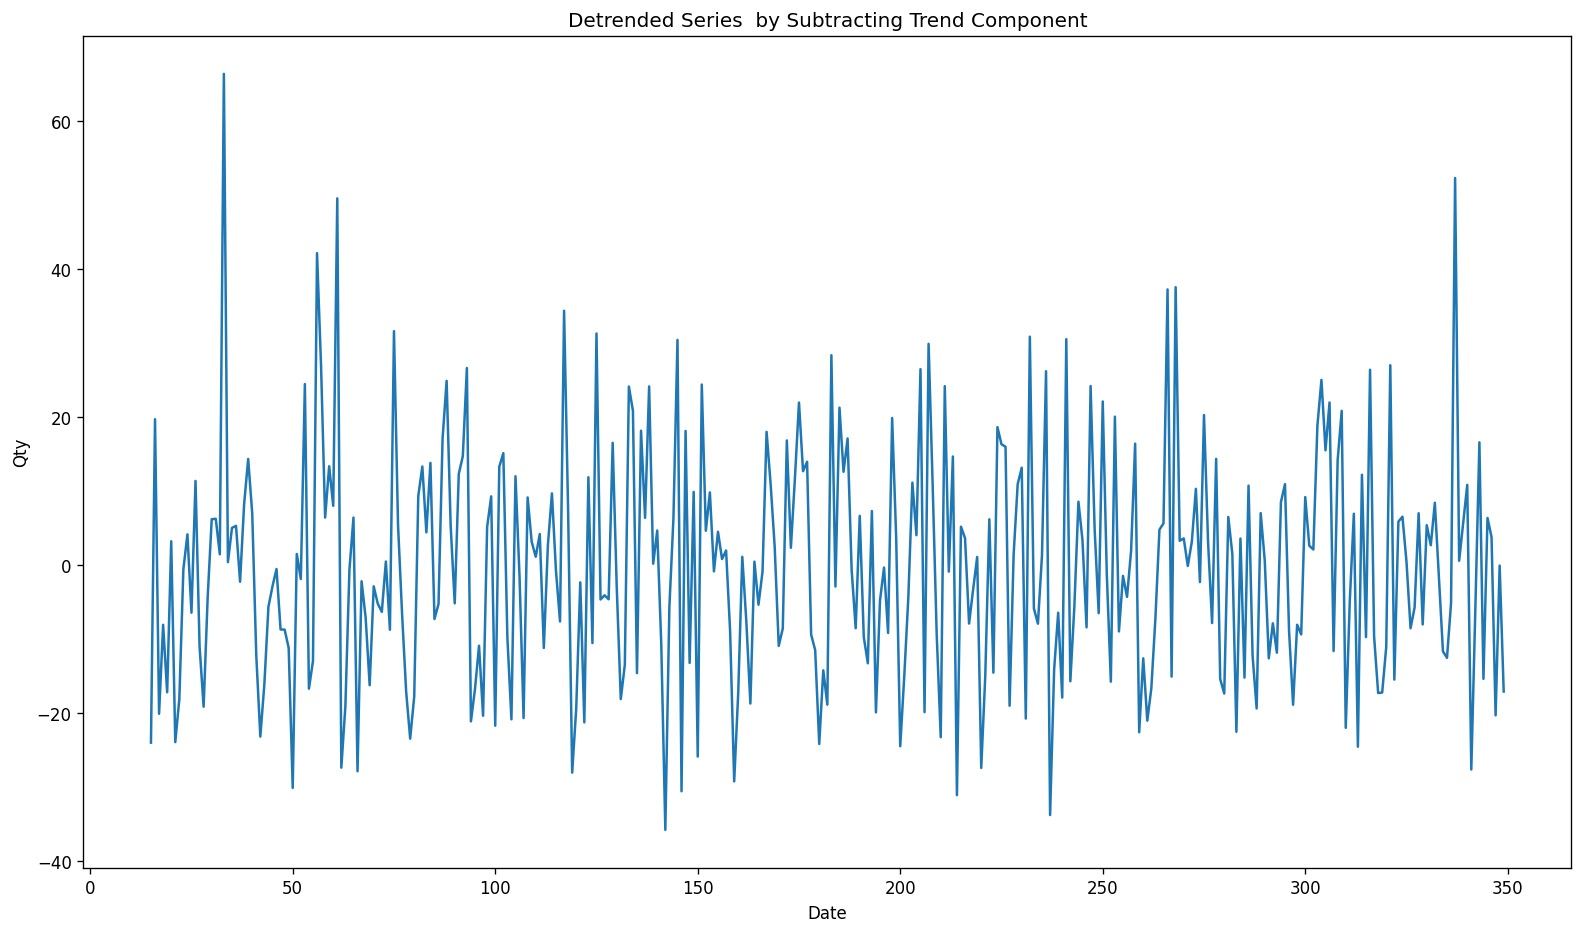

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_multiplicative = seasonal_decompose(df_regression['Qty'], model='multiplicative',period=30)

dretrended = df_regression['Qty'] - result_multiplicative.trend

plt.figure(figsize=(16,9))
plt.plot(dretrended)
plt.title('Detrended Series  by Subtracting Trend Component')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()



### Deseasonalize a Time Series

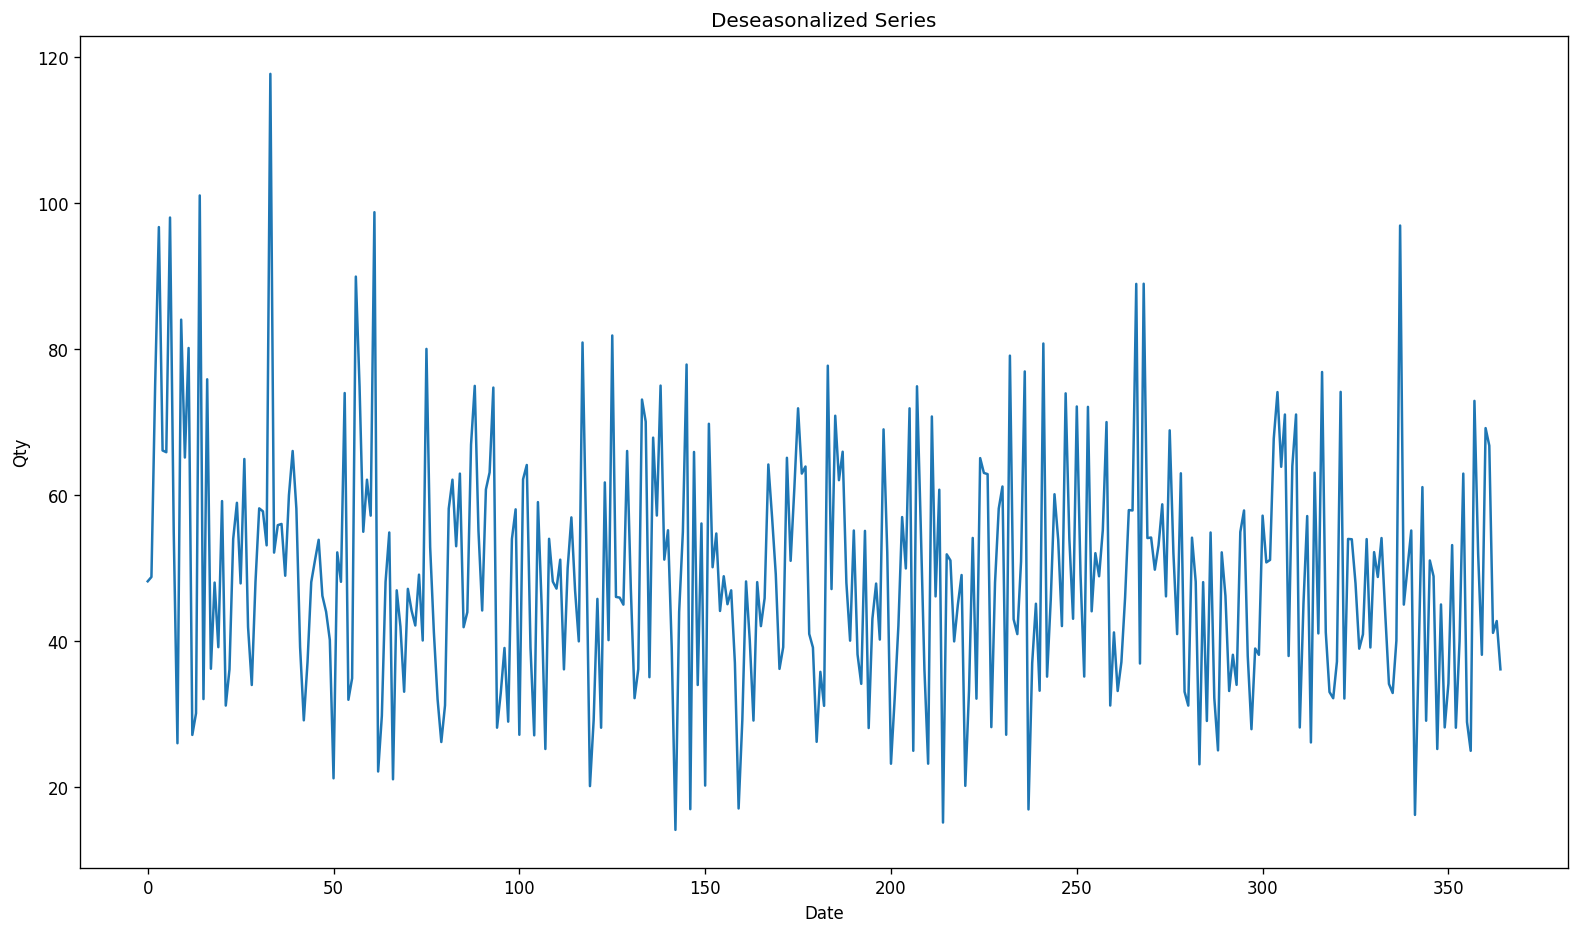

In [169]:
result_multi = seasonal_decompose(df_regression['Qty'], model='multiplicative',period=30)

deseasonalized = df_regression['Qty'] - result_multi.seasonal

plt.figure(figsize=(16,9))
plt.plot(deseasonalized)
plt.title('Deseasonalized Series')
plt.xlabel('Date')
plt.ylabel('Qty')   
plt.show()


### Autocorrelation and Partial Autocorrelation Functions

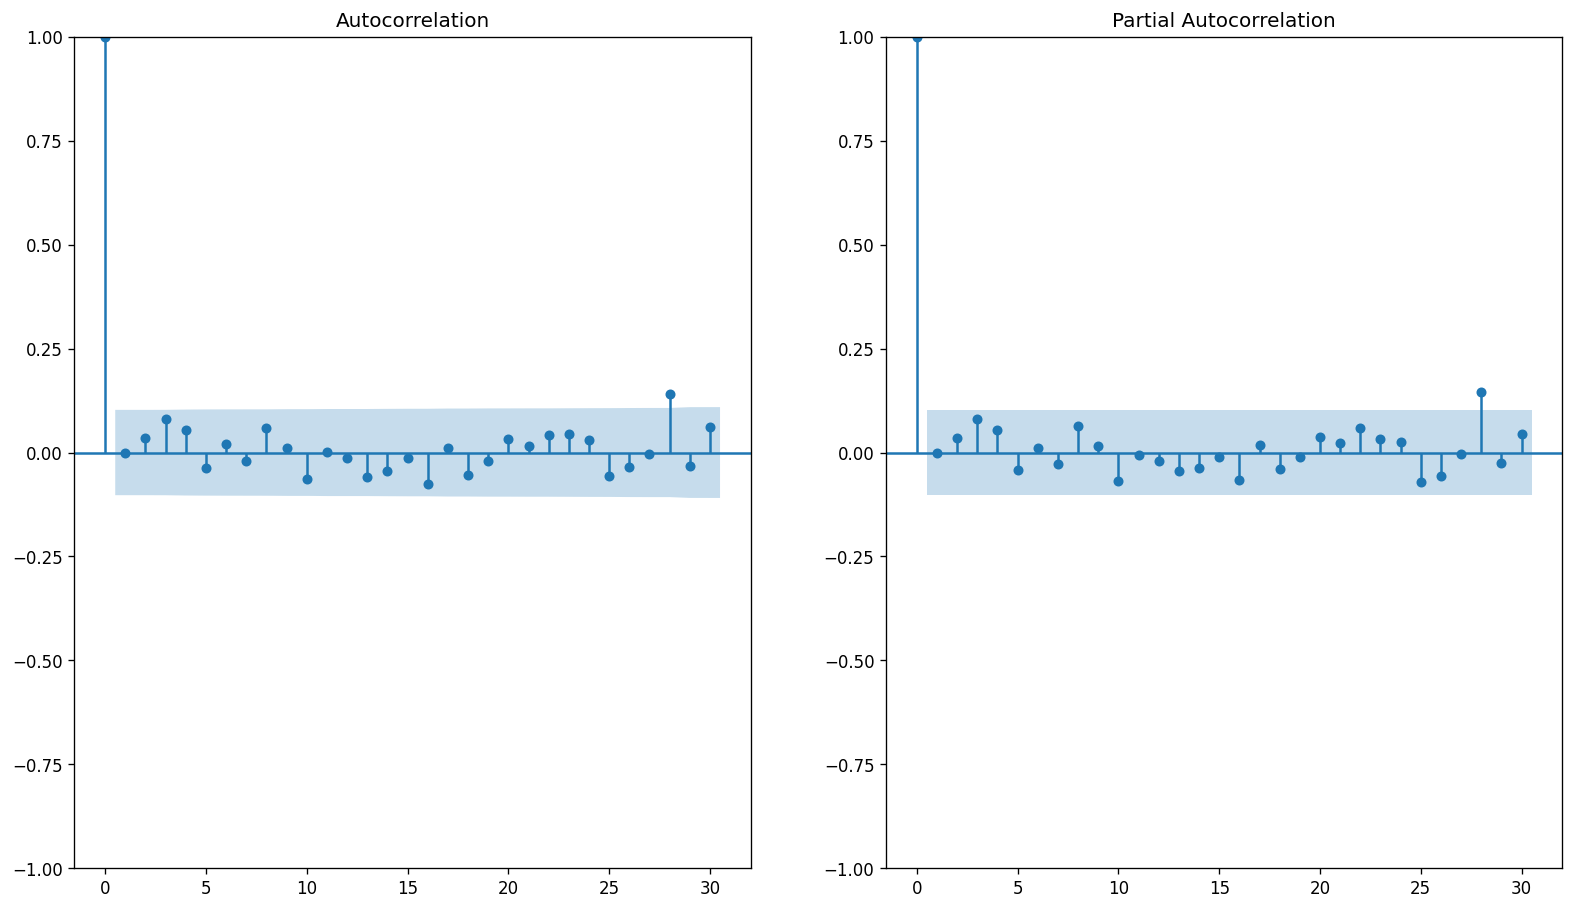

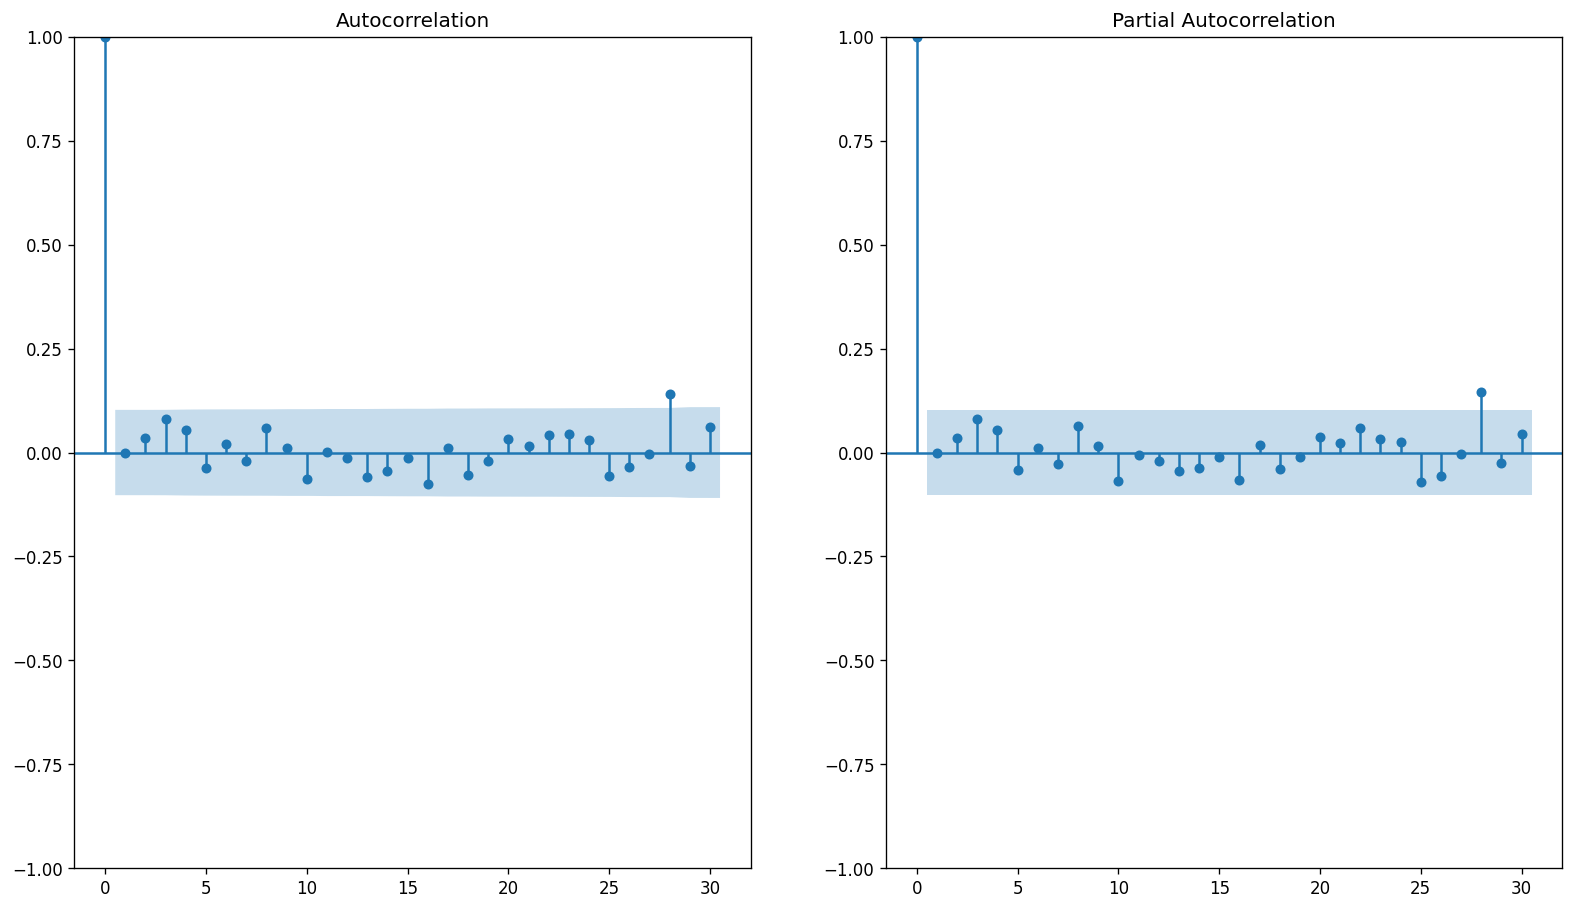

In [170]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,axes = plt.subplots(1,2,figsize=(16,9))
plot_acf(df_regression['Qty'].tolist(),lags=30,ax=axes[0])
plot_pacf(df_regression['Qty'].tolist(),lags=30,ax=axes[1])

### **Modeling & Evaluation**

In [171]:
series = df_regression['Qty']

In [172]:
train = series.iloc[:-31]
test = series.iloc[-31:]

In [173]:
train.shape,test.shape

((334,), (31,))

### Parameter Analysis for the ARIMA Model

In [174]:
import pmdarima as pm

auto_arima = pm.auto_arima(
    series,
    start_p=1,start_q=1,
    test='adf',
    max_p=3,max_q=3,
    m=12,
    d=None,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(auto_arima.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3103.284, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3933.778, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3330.761, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3688.453, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3105.211, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3105.214, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3567.999, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3232.248, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3106.213, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3098.260, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3096.267, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3094.267, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3096.267, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.952 seconds
                      

In [175]:
auto_arima

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

***Observasi***

* Based on the SARIMAX results, it shows that:
    * The SARIMAX model with an AIC value of 3094.267 and BIC of 3102.067 was selected as the best model, namely ARIMA(0,0,0)(0,0,0)[0] intercept.
    * The lower the AIC and BIC values, the better the model.

***Interpretation the Residual Plots in ARIMA Model***

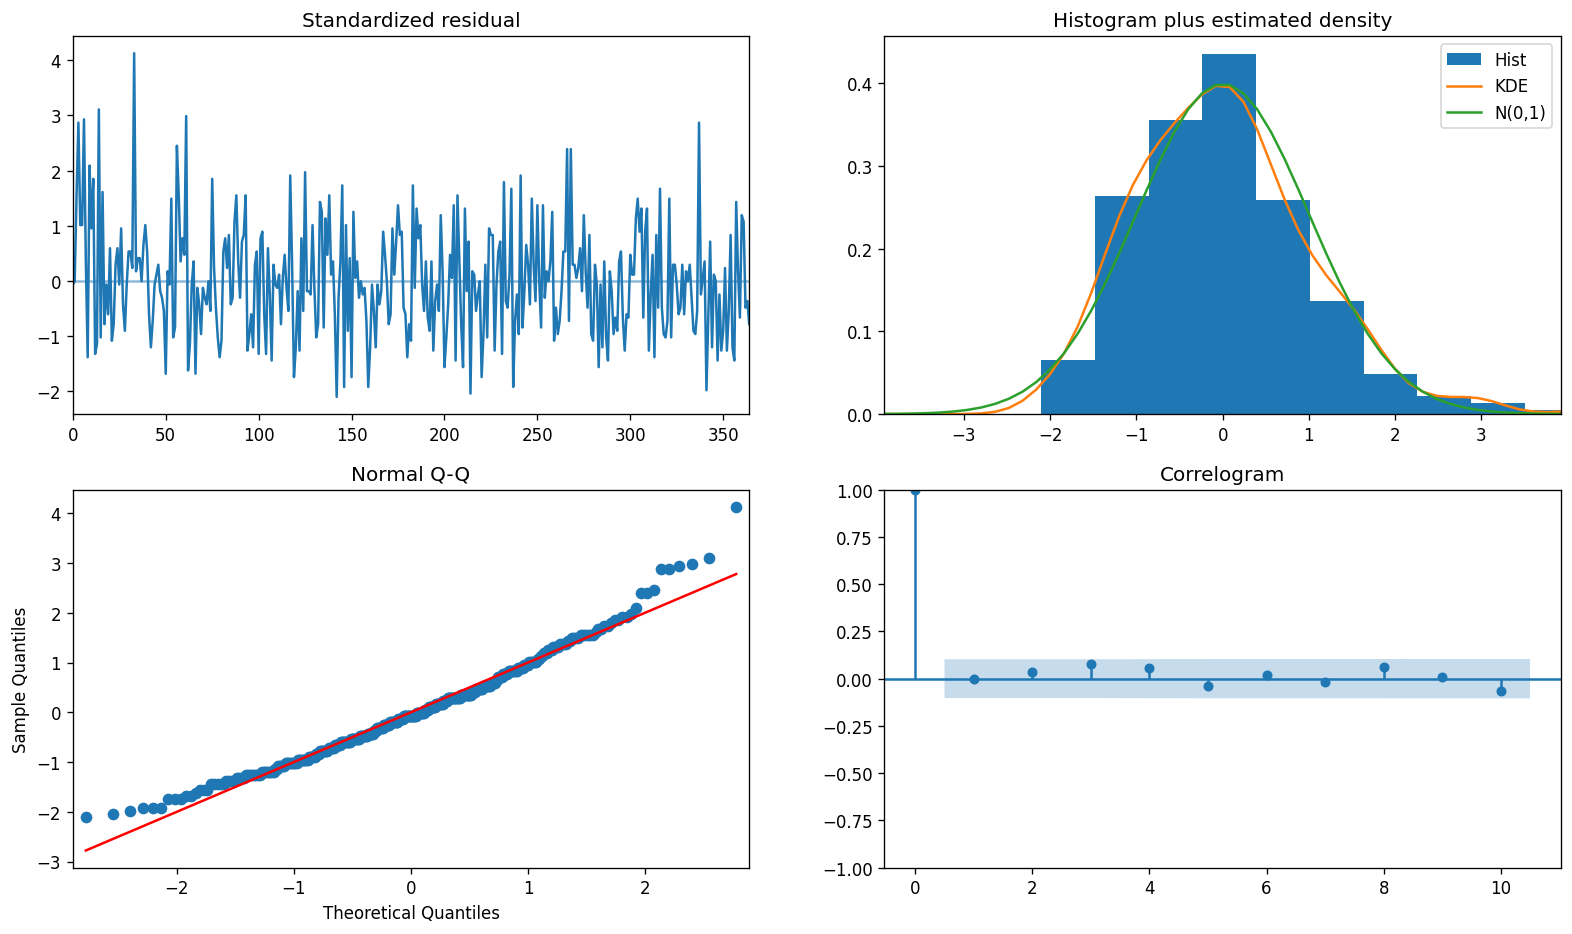

In [176]:
auto_arima.plot_diagnostics(figsize=(16,9))
plt.show()

**Manual ARIMA** <br>
*Parameter Estimation*

In [177]:
from pmdarima import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


def manual_arima(p,d,q):
    model = ARIMA(train,order=(p,d,q))
    model_fit = model.fit()
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=len(test))

    mae = mean_absolute_error(test,forecast)
    mape = mean_absolute_percentage_error(test,forecast)
    rmse = np.sqrt(mean_squared_error(test,forecast))

    return mae,mape,rmse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


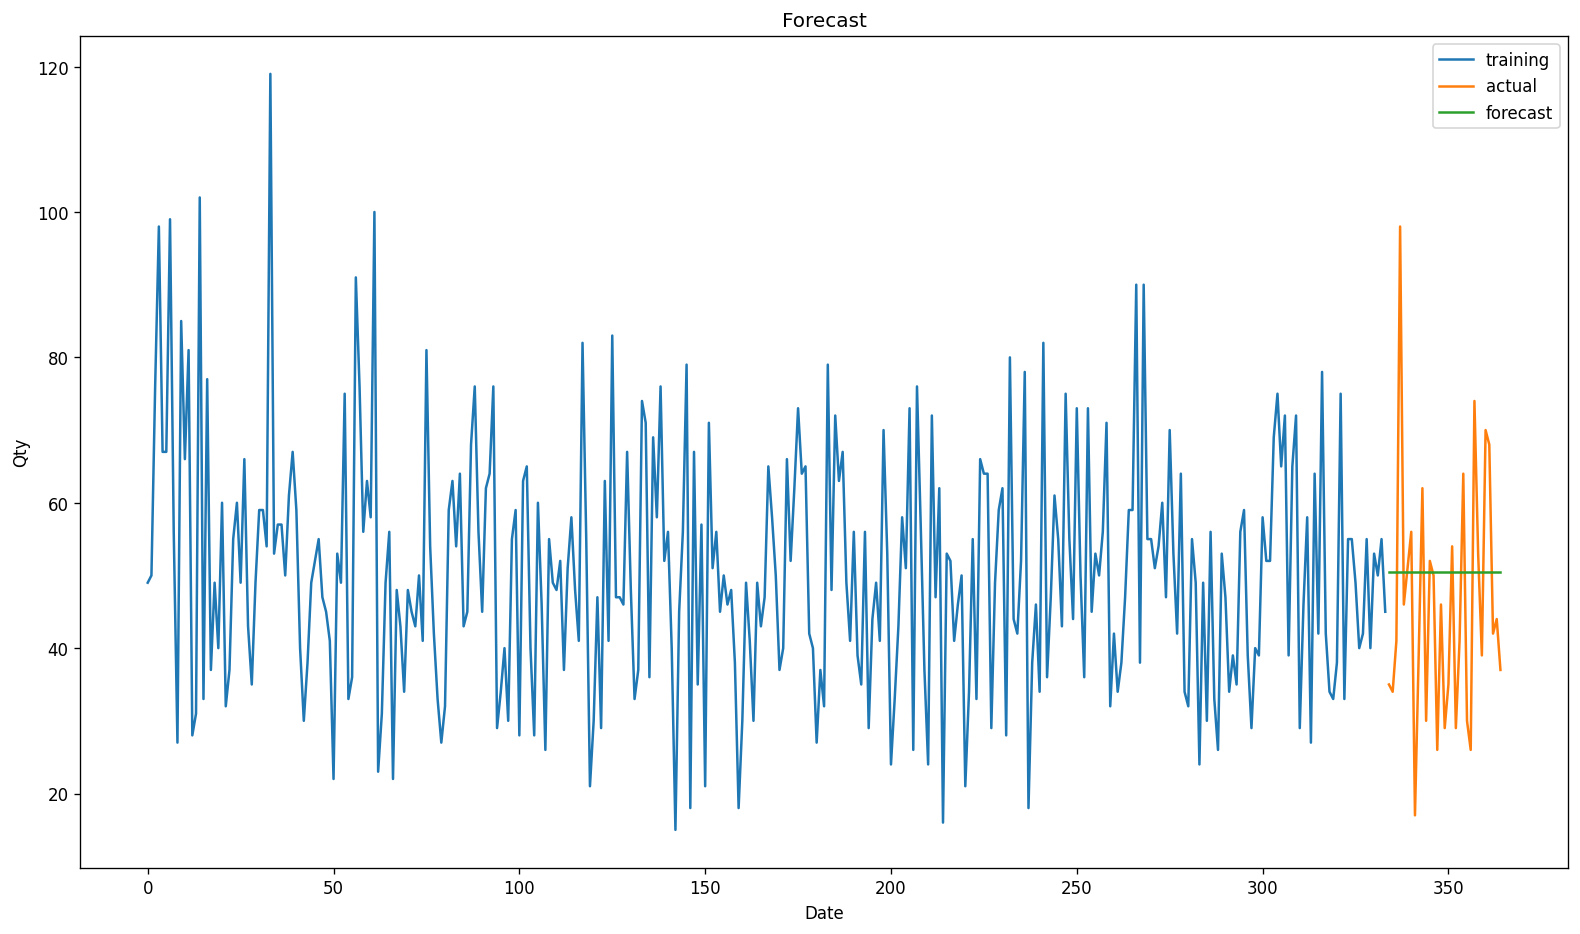

In [186]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

model_manual = ARIMA(train,order=(1,1,1))
model_fit_manual = model_manual.fit()

forecast_manual = model_fit_manual.forecast(steps=len(test))


model_auto = auto_arima(train,start_p=1,start_q=1,
                        max_p=3,max_q=3,
                        m=12,d=None,D=1,seasonal=False,)

forecast_auto = model_auto.predict(n_periods=len(test))

plt.figure(figsize=(16,9))
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_auto, label='forecast')
plt.legend()
plt.show()

In [195]:
mae_auto = mean_absolute_error(test,forecast_auto)
mape_auto = mean_absolute_percentage_error(test,forecast_auto)
rmse_auto = np.sqrt(mean_squared_error(test,forecast_auto))


mae_manual = mean_absolute_error(test,forecast_manual)
mape_manual = mean_absolute_percentage_error(test,forecast_manual)
rmse_manual = np.sqrt(mean_squared_error(test,forecast_manual))

print('Auto ARIMA :')
print(f'MAE : {mae_auto}')
print(f'MAPE : {mape_auto}')
print(f'RMSE : {rmse_auto}')

print('Manual ARIMA :')
print(f'MAE : {mae_manual}')
print(f'MAPE : {mape_manual}')
print(f'RMSE : {rmse_manual}')

Auto ARIMA :
MAE : 14.219238941471897
MAPE : 0.3885997998095394
RMSE : 17.49976884016021
Manual ARIMA :
MAE : 13.961599463229986
MAPE : 0.37586689846040383
RMSE : 17.255112316993962


***Observasi***

* Based on the evaluation results, it can be seen that the Manual ARIMA model has a much better evaluation value than the Auto-ARIMA model.
    * The MAE, MAPE, and RMSE of the Manual ARIMA model are much smaller, indicating better performance in prediction.

**Forecasting Overall Quantity**

In [196]:
model = ARIMA(train,order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

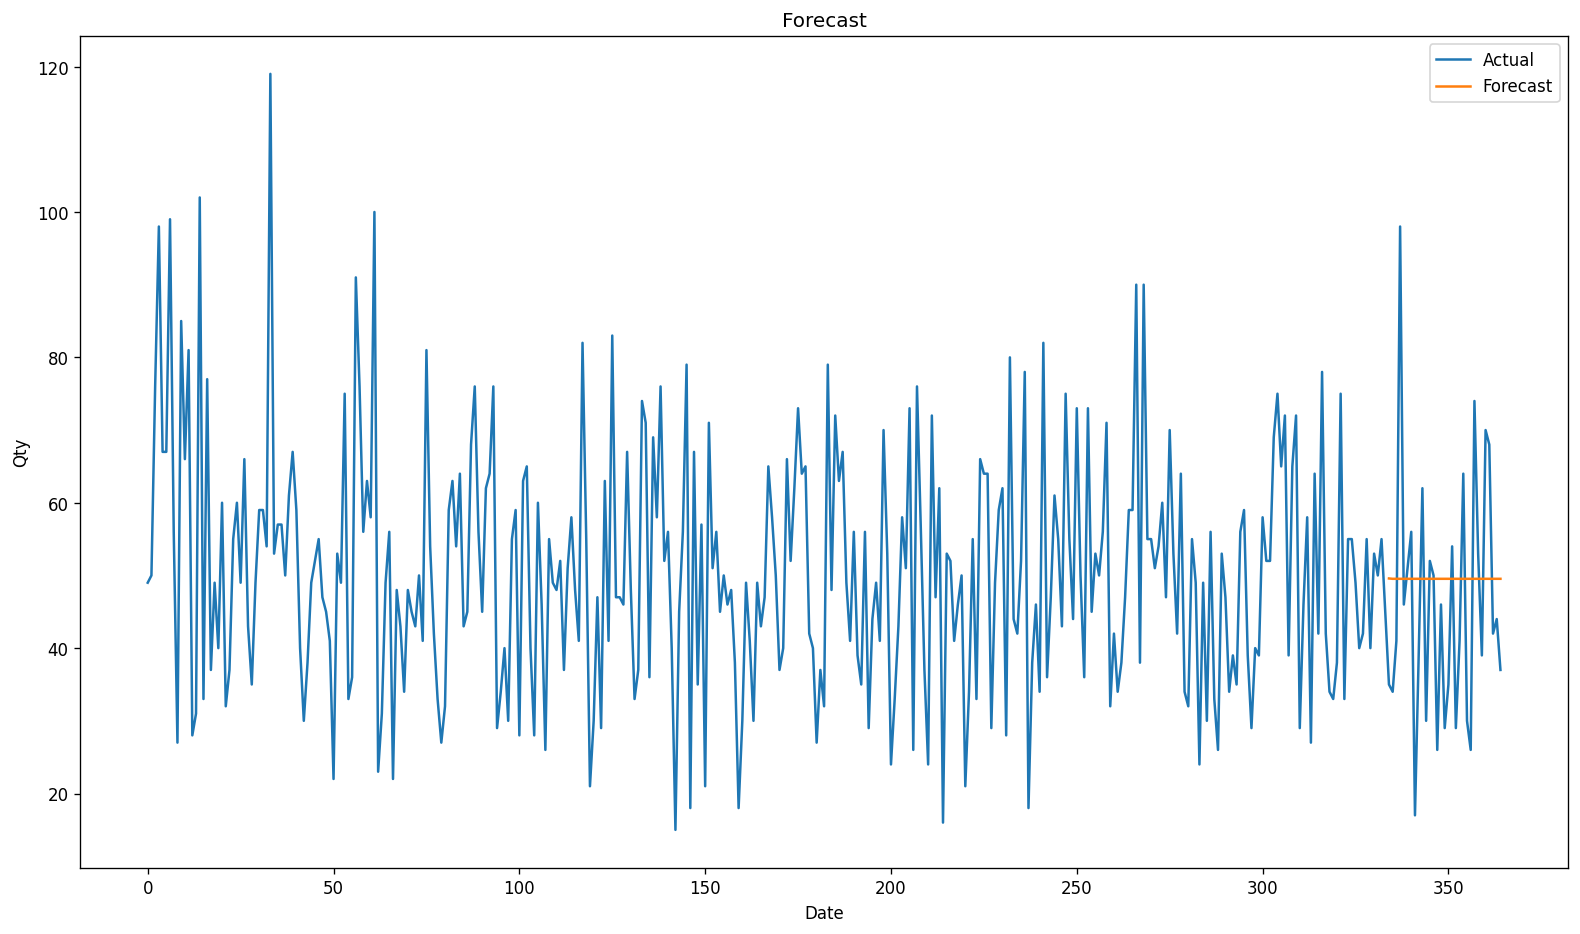

In [199]:
plt.figure(figsize=(16,9))
plt.plot(df_regression['Qty'],label='Actual')
plt.plot(forecast,label='Forecast')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.legend()
plt.show()


In [201]:
forecast_manual.mean().round(0)

50.0

***Insight***
*  Based on the prediction results, it can be concluded that the number of sales next month is expected to be around 50 pieces/day.

**Forecasting Each Product**

In [202]:
df.columns

Index(['Date', 'Price_x', 'Qty', 'TotalAmount', 'Product Name', 'Price_y',
       'StoreName', 'GroupStore', 'Type', 'Age', 'Gender', 'Marital Status',
       'Income'],
      dtype='object')

In [206]:
list_p = df['Product Name'].unique()

df_dt = pd.DataFrame({'Date':pd.date_range(start='2023-01-01',end='2023-01-31')})

df_dt = df_dt.set_index('Date')

for i in list_p:
    data = df[['Date','Product Name','Qty']]
    data = data[data['Product Name']==i]
    data = data.groupby('Date')[['Qty']].sum().reset_index()

    data['Date'] = pd.to_datetime(data['Date'])

    data_time = pd.DataFrame({'Date':pd.date_range(start='2022-01-01',end='2022-12-31')})

    data_time = data_time.merge(data,how='left',on='Date')

    data_time = data_time.fillna(0)
    data_time = data_time.set_index('Date')

    model_dt = ARIMA(data_time['Qty'],order=(1,1,1))
    model_fit_dt = model_dt.fit()
    forecast_dt = model_fit_dt.forecast(steps=len(test))
    df_dt[i] = forecast_dt.values

df_dt.head()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

,Crackers,Yoghurt,Choco Bar,Cheese Stick,Oat,Thai Tea,Coffee Candy,Potato Chip,Ginger Candy,Cashew
Date,,,,,,,,,,
2023-01-01,5.095459,5.251505,5.734745,5.447414,2.657415,7.823444,5.478878,3.942439,7.017669,1.753152
2023-01-02,4.899853,5.371895,5.398044,5.416610,2.624686,7.484518,5.755996,3.669057,7.183883,1.683572
2023-01-03,4.886680,5.378332,5.417813,5.418731,2.623888,7.499201,5.744219,3.688014,7.193038,1.690000
2023-01-04,4.885793,5.378676,5.416652,5.418585,2.623869,7.498565,5.744720,3.686699,7.193543,1.689406
2023-01-05,4.885733,5.378695,5.416720,5.418595,2.623868,7.498592,5.744699,3.686791,7.193570,1.689461


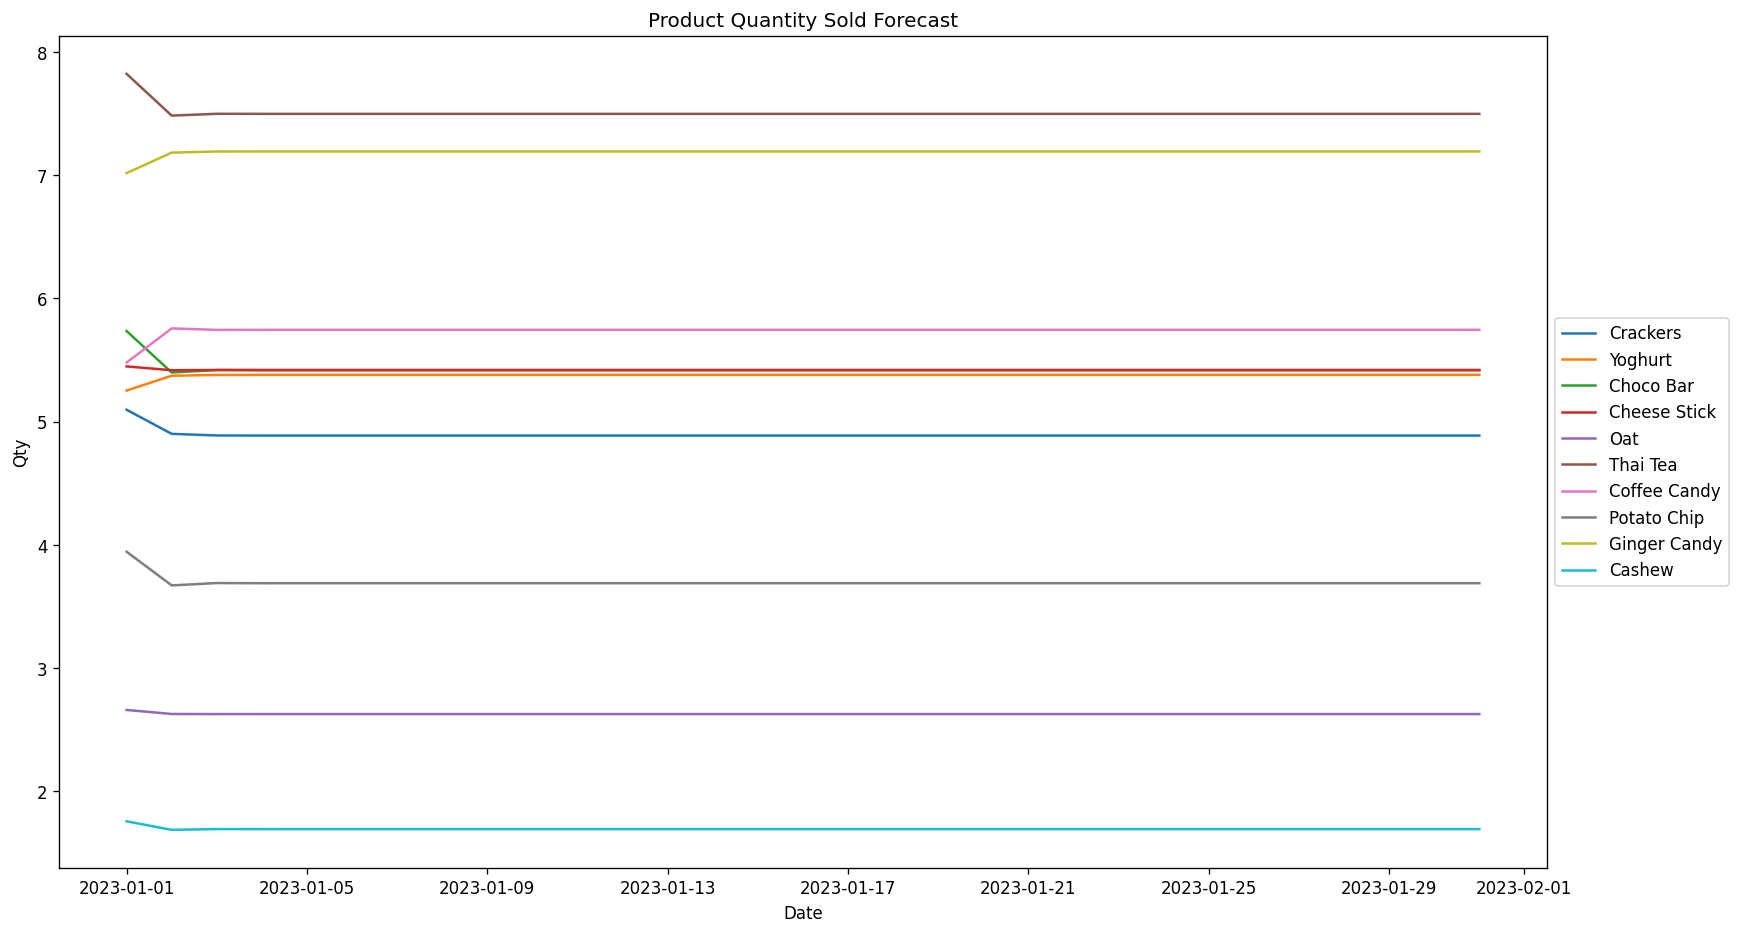

In [209]:
plt.figure(figsize=(16,9))
plt.plot(df_dt)
plt.legend(df_dt.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Product Quantity Sold Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')   
plt.show()


In [210]:
round(df_dt.describe().T['mean'],0).astype(int)

Crackers        5
Yoghurt         5
Choco Bar       5
Cheese Stick    5
Oat             3
Thai Tea        8
Coffee Candy    6
Potato Chip     4
Ginger Candy    7
Cashew          2
Name: mean, dtype: int64